In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

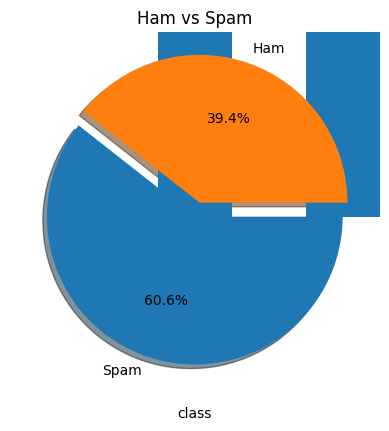

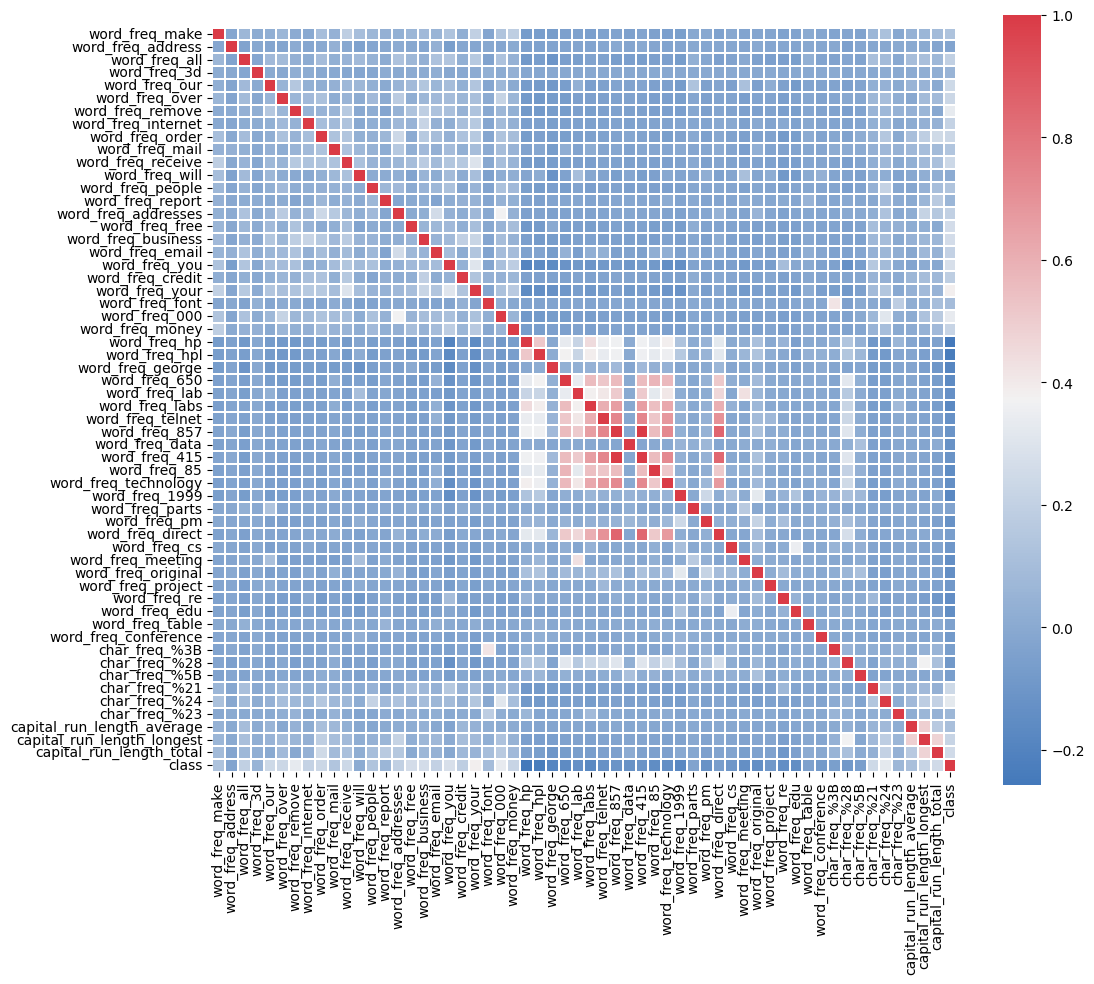

MultinomialNB()

In [8]:
df = pd.read_csv('email.csv')

# Visualize the features from the dataset
df.iloc[::,-1].value_counts().plot(kind='bar')
#plt.show()

# Preprocessing
X = df.iloc[::,:-1]
y = df.iloc[::,-1]

labels = ['Spam','Ham']
explode=np.zeros(len(labels))
explode[-1]=0.1
plt.title("Ham vs Spam")
plt.pie(df.iloc[:,-1].value_counts(), labels=labels, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

corr=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=sns.diverging_palette(250, 10, as_cmap=True),
        square=True,
        linewidths=.1)
plt.show()

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

Training Accuracy: 0.8021739130434783
Accuracy Score: 0.8121606948968513


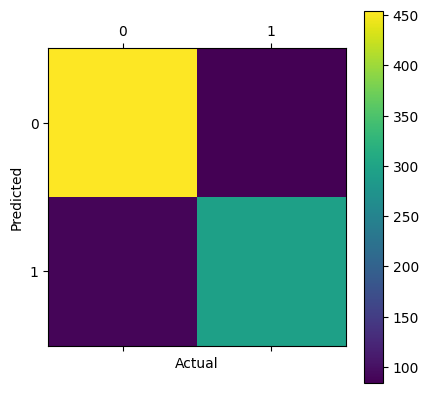

In [7]:
def pred_plot(model):
        y_pred = model.predict(X_test)

        print('Training Accuracy:', model.score(X_train, y_train))

        print('Accuracy Score:', accuracy_score(y_test, y_pred))

        # Confusion matrix
        confusion = confusion_matrix(y_test, y_pred)

        # Visualising the results
        plt.matshow(confusion)
        plt.colorbar()
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show()

pred_plot(model_nb)